<a href="https://colab.research.google.com/github/StivenVelasquez/Clasificacion-de-trafico-ataques-/blob/main/clasificaci%C3%B3n_de_tr%C3%A1fico(ataques).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>CLASIFICACIÓN DE TRÁFICO(ATAQUES)



Daniel Muñoz

Stiven Velásquez

<div align="center"><img src="https://drive.google.com/uc?id=17owvJT-2QO61UDm-PHMex95YP1Ks83q0" width="300" ></div>

Abril 2022



---

</center></h1>

**PROPÓSITO DEL PROYECTO**

Se analiza una base de datos la cual tiene una serie de tráfico entre benigno y Darknet. Este trabajo propone una técnica novedosa para detectar y caracterizar las aplicaciones de VPN y Tor juntas como el verdadero representante del tráfico de la red oscura.

Se analiza una base de datos con un registro grande de características en cuanto a tráfico en la red se refiere, se entiende, se caracteriza y  se entrena un modelo que pueda detectar tráfico malicioso que entra a una red, dando un monitoreo temprano antes de que ocurra un ataque.

1. **_Lo primero que se debe realizar es importar las librerias a utilizar de python_**

**Importacion de librerias**

In [ ]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats

import pickle  # To load data int disk
from prettytable import PrettyTable  # To print in tabular format

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.metrics import auc, f1_score, roc_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

pd.set_option("display.max_columns", None) #Mostrar todas las columnas en los head

%matplotlib inline

# copiando el archivo mlutils.py en la carpeta local
!wget "https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py"
import mlutils


--2022-04-08 02:57:33--  https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s06/mlutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10691 (10K) [text/plain]
Saving to: ‘mlutils.py’

mlutils.py          100%[===================>]  10.44K  --.-KB/s    in 0s      

2022-04-08 02:57:33 (54.7 MB/s) - ‘mlutils.py’ saved [10691/10691]



**1. Preparacion de la data**

**_Se realiza el cargue de la data en Colab para posteriormente almacenarlo como un data freme en una variable_**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**_Se lee el csv y se almances en "data_df"_**

In [ ]:
DATA = 'drive/My Drive/Universidad/2021-2/Redes De Computadores II/Seguimiento/Darknet.csv' #Ruta del archivo en el drive
data_df=pd.read_csv(DATA) #Para leer archivo

In [ ]:
data_df.head()  #Para mostrar vista previa del archivo

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,24/07/2015 04:09:48 PM,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.00000,0.00000,229,229,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,24/07/2015 04:09:48 PM,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.00000,0.00000,407,407,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,24/07/2015 04:09:48 PM,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.00000,0.00000,431,431,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,24/07/2015 04:09:48 PM,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.00000,0.00000,359,359,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,24/07/2015 04:09:45 PM,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.32424,11412.46641,78158,13,10778451,18268.56102,11786.14309,81171,126,10747836,26936.93233,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


**Del analisis superficial que se le realizo a la base encontramos que la columna "Label" contiene la caracteristica de categorizacion del trafico que vamos a analizar, de la documentacion de la web donde se obtuvo la data se nos idica que la idea es que la base esta categorizada en dos grandes grupo**

1. Darknet, hace referecia a todo el trafico que usa Tor o VPN
2. Benigno, trafico normal que no usa ni Tor o VPN

**Al analizar los valores unicos de esta columna corroboramos que estan presentes estas 4 categorias**

In [ ]:
data_df['Label'].unique() # Para saber que valores tiene la columna label

array(['Non-Tor', 'NonVPN', 'Tor', 'VPN'], dtype=object)

**La idea inicial antes de comenzar a hacer el analisis del dataframe es llevar a cabo una limpieza y estandarizacion de la base de datos proceso de suma importancia para facilitar el analisis detallado de todas las caracteristicas contenidas en la base de datos**

In [ ]:
##Las ultimas dos columnas de la base son de tipo string, estas contienen la 
#categorizacion del trafico y el servicio usado, procedemos a poner en minuscula
#para que las funciones que se usaran posteriormente trabajen correctamente 

data_df["Label"]= data_df["Label"].str.lower()
data_df["Label.1"]= data_df["Label.1"].str.lower()

##Usamos esta funcion para crear una nueva columna de tipo binaria la cual resume
##la categorizacion de trafico siendo 0-trafico normal y 1-trafico darknet
data_df['DarkNet']=data_df['Label'].apply(lambda x:1 if x=='tor' or x=='vpn' else 0)

##Para lograr una mejor limpieza de la base de datos necesitamos tener un conocimiento
##muy profunda de la data, es decir conocer muy a detalle que informacion me brinda 
##cada una de las columnas para poder en primera instacia desechar ciertas columnas
##que podemos estar seguros no son necesarias, se intento buscar informacion acerca
##de que informacion era exactamente cada columna pero no fue posible detallarla
##ya que en la fuente de donde se obtuvo la data no se encontro claridad en cuanto a esta 
##informacion, por tanto se decidio eliminar las columnas que se muestran a continuacion
data_clean = data_df.drop(columns=['Src IP','Dst IP','Timestamp','Flow ID','Idle Mean','Idle Max','Idle Min'])
data_clean.columns=[col.lower().replace(' ','_') for col in data_clean.columns] # Para verificar que todo esta en minuscula y cambiar espacios por  guion y así ordenar
                                                                                # y preparar la data

#Las celdas en null o infinito representan problemas a la hora de realizar el analisis
#del dataframe por tanto el objetivo es encontrar estas celdas y realizar una 
#correccion de sus valores.

#la funcion is null retorna verdadero (1) donde una fila tenga un valor Null, y 
#la funcion sum, suma los unos por cada columna, encontramos que hay 34 celdas 
#con valor null
data_clean.isnull().sum().sum() 
data_clean[data_clean.isnull().any(axis=1)]

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,packet_length_min,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes/bulk_avg,fwd_packet/bulk_avg,fwd_bulk_rate_avg,bwd_bytes/bulk_avg,bwd_packet/bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_std,label,label.1,darknet
32902,443,52701,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1114,2075,0,20,0,0,0,0,0.0,non-tor,chat,0
33147,443,37492,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1047,1643,0,20,0,0,0,0,0.0,non-tor,chat,0
33173,443,41051,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1047,1643,0,20,0,0,0,0,0.0,non-tor,chat,0
33323,465,35807,6,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,0,0,0.0,0.0,0.0,0,0,2,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,20,0,0,0,0,0.0,non-tor,email,0
33596,465,33190,6,0,2,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,40,0,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,8393,0,0,20,0,0,0,0,0.0,non-tor,email,0
36426,80,44537,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,980,913,0,20,0,0,0,0,0.0,non-tor,file-transfer,0
36630,443,60982,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1114,2008,0,20,0,0,0,0,0.0,non-tor,file-transfer,0
36640,45140,443,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1825,1124,0,20,0,0,0,0,0.0,non-tor,file-transfer,0
36647,443,56194,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,980,980,0,20,0,0,0,0,0.0,non-tor,file-transfer,0
36759,9052,46623,6,0,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,NaN,inf,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,0.0,0.0,0,0,0.0,0.0,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,913,913,0,20,0,0,0,0,0.0,non-tor,file-transfer,0


In [ ]:
data_clean['flow_bytes/s']=data_clean['flow_bytes/s'].fillna(value=0) # Reemplazar valores null de la columna flow_bytes/s  por cero

# Reemplazar valores infinitos con nan
data_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN
data_clean.dropna(inplace=True)

#Mostramos el data_frame que resulta luego de aplicar los pasos de limpieza anteriores
data_clean.head()

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,packet_length_min,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes/bulk_avg,fwd_packet/bulk_avg,fwd_bulk_rate_avg,bwd_bytes/bulk_avg,bwd_packet/bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_std,label,label.1,darknet
0,57158,443,6,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.00000,0.00000,229,229,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000,non-tor,audio-streaming,0
1,57159,443,6,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.00000,0.00000,407,407,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000,non-tor,audio-streaming,0
2,57160,443,6,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.00000,0.00000,431,431,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000,non-tor,audio-streaming,0
3,49134,443,6,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.00000,0.00000,359,359,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000,non-tor,audio-streaming,0
4,34697,19305,6,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.32424,11412.46641,78158,13,10778451,18268.56102,11786.14309,81171,126,10747836,26936.93233,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,3117718.131,non-tor,audio-streaming,0


**El entrenamiento de un modelo para categorizacion de datos debe repartir el total de la base de datos en dos categorias una usada para entrenar el modelo "train" y otra para probarlo "test"**

In [ ]:
##Separamos la base de datos en dos grupos indispensable para modelar 
#train para entrenar el modelo y test para hacer pruebas
#El 30% es el porcentaje utilizado de la base de datos para hacer pruebas y el 70% es para entrenar el modelo
train, test = train_test_split(data_clean, test_size=0.3, random_state=16)

#print(train.shape,'\n',test.shape) #tamaño de cada muestra
print(f'El tamaño de la muestra de entrenamiento es {train.shape}, y el tamaño de la muestra de test es {test.shape}')

# muestra de entrenamiento->99036 registros con 79 columnas y el tama de la muestra para hacer pruebas es de 42445 registros con 79 columnas

El tamaño de la muestra de entrenamiento es (99036, 79), y el tamaño de la muestra de test es (42445, 79)


**_Correlacion_**


1. Se hara una correlacion de todas las columnas en un mapa de calor
2. Obtener valores de correlación para todas las características.
3. Pairplot entre caracteristicas altamente correlacionadas.
4. Para caracteristicas numericas,se graficara la pdf

In [ ]:
# Dividimos la data contenida en train entre categoria normal y anormal
normal = train[train['darknet']==0] # Trafico normal-> la columna darknet tiene valores de 0
anomaly = train[train['darknet']==1]#Trafico anormal-> la columna darknet tiene valores de 1

In [ ]:
def multi_corr(col1, col2="label", df=train):
    '''
    Esta función devuelve la correlación entre 2 características dadas.
    También proporciona correlación de las funciones dadas con "etiqueta" después de aplicarle log1p.
    '''
    corr = df[[col1, col2]].corr().iloc[0,1]
    log_corr = df[col1].apply(np.log1p).corr(df[col2])

    print("Correlation : {}\nlog_Correlation: {}".format(corr, log_corr))

In [ ]:
# Se correlaciona cada valor de la variable de entrenamiento con la columna de darknet
def corr(col1, col2="darknet", df=train):
    """
    This function returns correlation between 2 given features
    """
    return df[[col1, col2]].corr().iloc[0,1]

**Se utiliza Pearson para determinar correlación lineal o no entre las caracteristicas de la data**

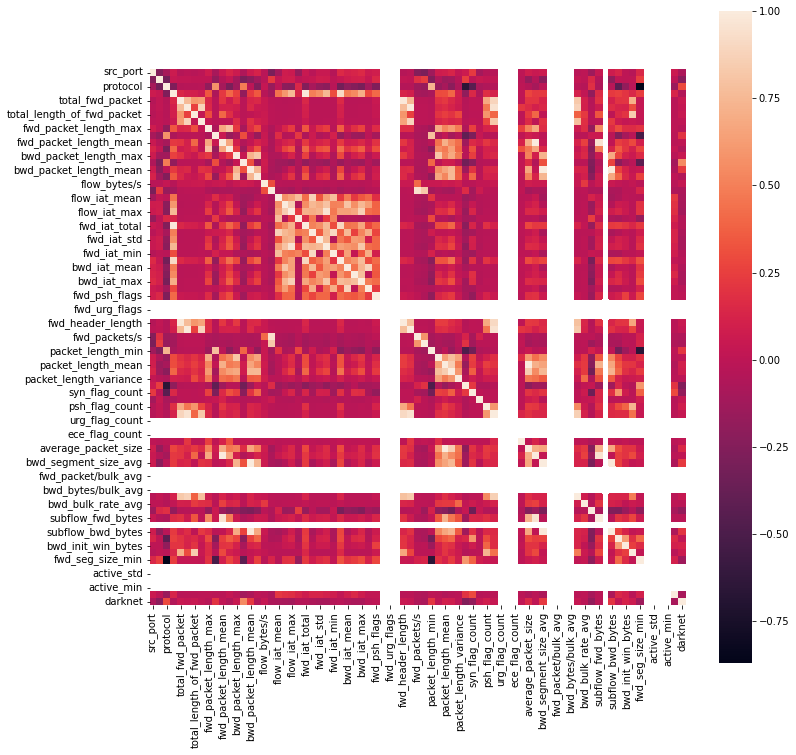

In [ ]:
# Plotting the correlation matrix of the dataset
# Refer: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

method = "pearson"
# correlation matrix
corr_mat = train.corr(method=method)

plt.figure(figsize=(12,12)) 
sns.heatmap(corr_mat, square=True)
plt.show()

**En la barra de temperatura entre más baja sea la temperatura es que las dos caracteristicas no tienen nada que ver entre si y mientras más altas es porque entre ellas dos hay cierto grado de correlación**

In [ ]:
# Obtener e imprimir características altamente correlacionadas
limit = 0.9

columns = corr_mat.columns
for i in range(corr_mat.shape[0]):
    for j in range(i+1, corr_mat.shape[0]):
        if corr_mat.iloc[i, j] >= 0.95: #Para caracteristicas que tienen un coeficiente de correlación muy alto
            print(f"{columns[i]:20s} {columns[j]:20s} {corr_mat.iloc[i, j]}")

flow_duration        fwd_iat_total        0.9874365263295974
total_fwd_packet     fwd_header_length    0.9805550159978016
total_bwd_packets    bwd_header_length    0.9902921395534944
total_bwd_packets    ack_flag_count       0.9513286489127067
fwd_packet_length_mean fwd_segment_size_avg 1.0
fwd_packet_length_mean subflow_fwd_bytes    0.9519114288448561
bwd_packet_length_mean bwd_segment_size_avg 1.0
bwd_packet_length_mean subflow_bwd_bytes    0.9818200380446691
flow_iat_max         fwd_iat_max          0.962415175810079
bwd_header_length    ack_flag_count       0.9525889906653328
packet_length_mean   average_packet_size  0.9933479452857888
fwd_segment_size_avg subflow_fwd_bytes    0.9519114288448561
bwd_segment_size_avg subflow_bwd_bytes    0.9818200380446691


las características más correlacionadas son:



*   flow_duration, fwd_iat_total
*   total_fwd_packet, fwd_header_length
*   total_bwd_packets, bwd_header_length, ack_flag_count
*   fwd_packet_length_mean, fwd_segment_size_avg, subflow_fwd_bytes
*   bwd_packet_length_mean, bwd_segment_size_avg, subflow_bwd_bytes
*   flow_iat_max, fwd_iat_max
*   bwd_header_length, ack_flag_count
*   packet_length_mean, average_packet_size
*   fwd_segment_size_avg, subflow_fwd_bytes
*   bwd_segment_size_avg, subflow_bwd_bytes

**Pairplots de características altamente correlacionadas**
1. Estas características tienen una correlación muy alta entre ellas más del 95%
2. Todas las características siguen una línea recta, excepto los puntos de partida, lo que significa que tienen una relación creciente entre sí.

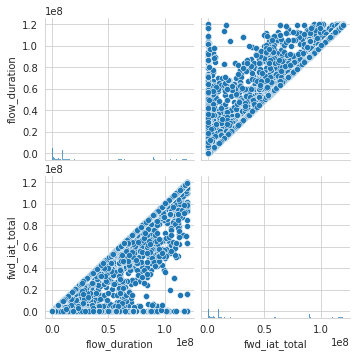

In [ ]:
# Correlación entre la duración del flujo  y la el tiempo total entre llegadas de reenvio

sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['flow_duration', 'fwd_iat_total'])
plt.show()

In [ ]:
#sns.set_style("whitegrid")
#sns.pairplot(data=train, vars=['total_fwd_packet', 'fwd_header_length'])
#plt.show()

In [ ]:
#sns.set_style("whitegrid")
#sns.pairplot(data=train, vars=['total_bwd_packets', 'bwd_header_length', 'ack_flag_count'])
#plt.show()

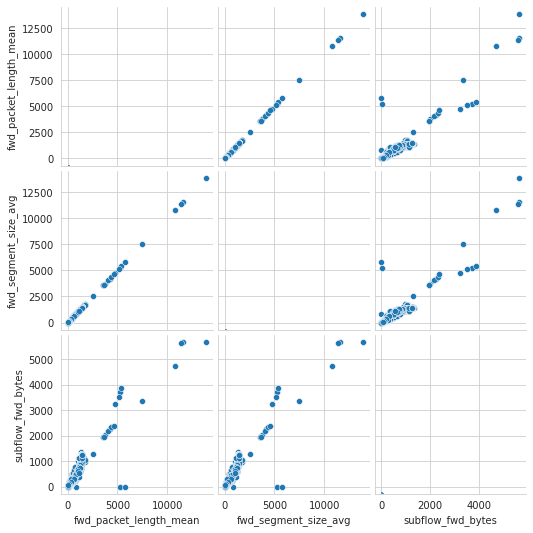

In [ ]:
#longitud media de paquetes de reenvio, tamañp promedio de los segmentos de reenvio, bytes de reenvio de flujo
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['fwd_packet_length_mean', 'fwd_segment_size_avg', 'subflow_fwd_bytes'])
plt.show()

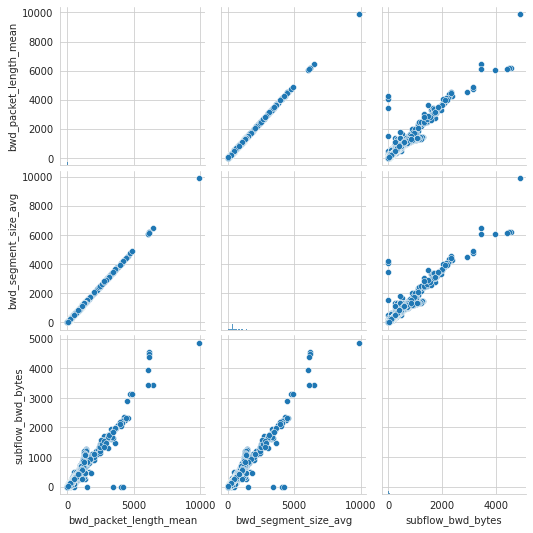

In [ ]:
#longitud medio del ancho de banda de los paquetes, tamaño promedio del ancho de banda de los sementos, ancho de banda del subflujo de bytes

sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['bwd_packet_length_mean', 'bwd_segment_size_avg', 'subflow_bwd_bytes'])
plt.show()

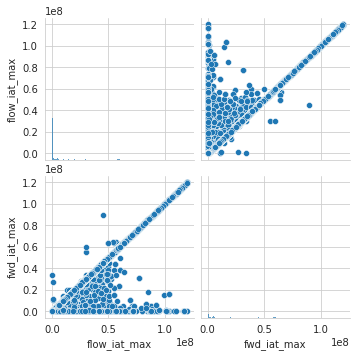

In [ ]:
#Tiempo entre llegadas maximo en el flujo, tiempo entre llegadas maximo en el reenvio
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['flow_iat_max', 'fwd_iat_max'])
plt.show()

In [ ]:
#sns.set_style("whitegrid")
#sns.pairplot(data=train, vars=['bwd_header_length', 'ack_flag_count'])
#plt.show()

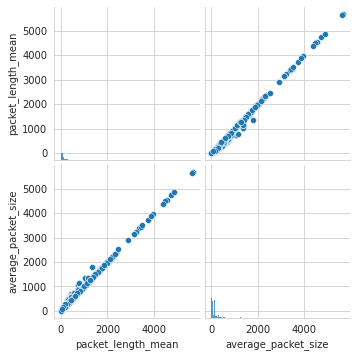

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['packet_length_mean', 'average_packet_size'])
plt.show()

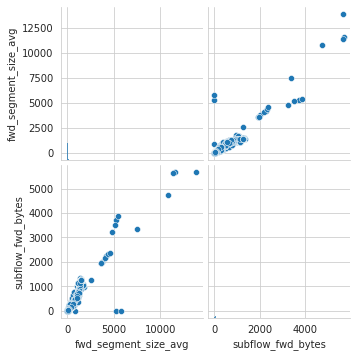

In [ ]:
#tamaño medio de los segmentos de reenvio, bytes de reenvio de subflujo
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['fwd_segment_size_avg', 'subflow_fwd_bytes'])
plt.show()

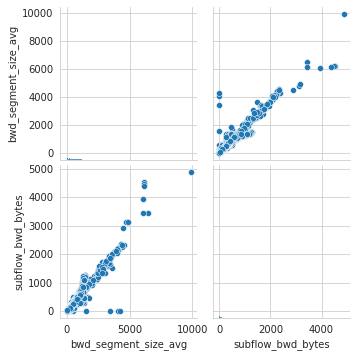

In [ ]:
#tamaño promedio del ancho de banda de los segmentos, ancho de banda del subflujo
sns.set_style("whitegrid")
sns.pairplot(data=train, vars=['bwd_segment_size_avg', 'subflow_bwd_bytes'])
plt.show()

**Countplots y pdf de características**

In [ ]:
def col_countplot(col, train_data=train):
    """
    Esta función traza el gráfico de conteo de una característica determinada para el conjunto de datos de entrenamiento
    """
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set_style('whitegrid')
    # countplot de la columna dada
    ax = sns.countplot(x=col, hue='darknet', data=train_data)
    ax.legend(loc="upper right", labels=('normal', 'darknet'))
    ax.set_title("train data")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# Plotting pdf of numerical columns
# Refer: https://www.kaggle.com/khairulislam/unsw-nb15-eda

def dual_plot(col, data1=normal, data2=anomaly, label1='Normal Traffic', label2='VPN-Tor Traffic', method=None):
    """
    Esta función traza el pdf de la función dada en datos de ataque y no ataque
    """
    if method != None:
        sns.set_style('whitegrid')
        sns.distplot(data1[col].apply(method), label=label1, hist=False, rug=True)
        sns.distplot(data2[col].apply(method), label=label2, hist=False, rug=True)
    else:
        sns.set_style('whitegrid')
        sns.distplot(data1[col], label=label1, hist=False, rug=True)
        sns.distplot(data2[col], label=label2, hist=False, rug=True)
    plt.legend()

In [ ]:
def reduce_column(s, to_keep):
    """
   Esta función reduce los valores categóricos de una característica determinada a los valores proporcionados en la lista to_keep
    y hacer que todos los demás valores sean "otros"
    """
    s = s.lower().strip()
    if s not in to_keep:
        return "others"
    else:
        return s

**Categoría de ataque**

El nombre de cada categoría de ataque. En este conjunto de datos, hay un total de nueve categorías de ataque.

En los datos de entrenamiento , las categorías de datos de ataque más ocurridas son "Darknet"

In [ ]:
train['darknet'].unique() #Para confirmar datos en la columna de Darknet

array([0, 1])

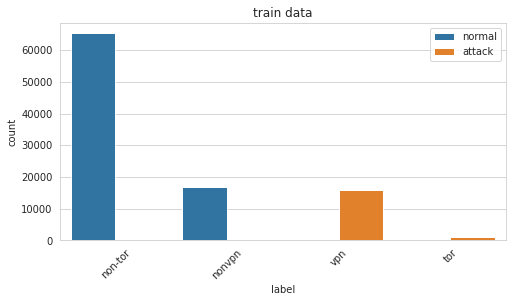

In [ ]:
col_countplot('label')

En la data de entrenamiento:

1. Trafico non-tor-> 65000 registros
2. Trafico nonvpn-> 17000 registros
3. Trafico vpn->15000 registros
4. Trafico tor->50 registros

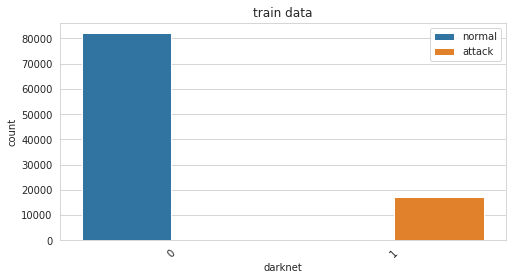

In [ ]:
col_countplot('darknet') #Se grafica el total de trafico Darknet y trafico normal

**Protocolos**

Se caracteriza la relación entre los protocolos y el tipo de gráfico.
En la data se pueden encontrar los siguientes protocolos:

0 - HOPOPT

6 - TCP

17 - UDP

In [ ]:
#Para mejor visualización se reemplazan los valores de 0, 6, 17 por sus protocolos respectivos
def ReplaceProtocol(x):
  if x == 0:
    return 'hopopt'
  elif x == 6:
    return 'tcp'
  elif x == 17:
    return 'udp'

train['protocol']=train['protocol'].apply(ReplaceProtocol)

train.head()

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,packet_length_min,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes/bulk_avg,fwd_packet/bulk_avg,fwd_bulk_rate_avg,bwd_bytes/bulk_avg,bwd_packet/bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_std,label,label.1,darknet
66333,51827,17553,tcp,335051,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,8.953861,1.675255e+05,2.367514e+05,334934,117,335051,1.675255e+05,2.367514e+05,334934,117,0,0.000,0.000000e+00,0,0,0,0,0,0,60,0,8.953861,0.000000,0,0,0.000000,0.000000,0.000000,2,0,0,0,3,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,913,0,0,20,0,0,0,0,0.000000e+00,non-tor,p2p,0
110054,57621,57621,udp,113946771,4,0,176,0,44,44,44.000000,0.000000,0,0,0.000000,0.000000,1.544581,0.035104,3.798226e+07,6.184285e+03,37987094,37975289,113946771,3.798226e+07,6.184285e+03,37987094,37975289,0,0.000,0.000000e+00,0,0,0,0,0,0,32,0,0.035104,0.000000,44,44,44.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,55.000000,44.000000,0.000000,0,0,0,0,0,0,1,44,0,0,0,0,3,8,0,0,0,0,8.270970e+14,nonvpn,chat,0
61888,36901,21347,tcp,105027432,15,14,2061,2475,1460,0,137.400000,383.471698,1024,0,176.785714,305.767679,43.188717,0.276118,3.750980e+06,1.097803e+07,45888687,5,105027432,7.501959e+06,1.483290e+07,45888687,177,105026898,8078992.154,1.528179e+07,45889536,26,0,0,0,0,312,292,0.142820,0.133299,0,1460,151.200000,337.792571,114103.820700,0,2,0,13,28,0,0,0,0,156.413793,137.400000,176.785714,0,0,0,0,7,4480,0,71,0,85,14600,1278,5,20,0,0,0,0,3.400334e+07,non-tor,p2p,0
69665,39736,19899,tcp,64500325,19,18,979,0,213,0,51.526316,50.937182,0,0,0.000000,0.000000,15.178218,0.573641,1.791676e+06,2.079092e+06,5795970,121,64500325,3.583351e+06,1.450838e+06,5796211,201217,62686869,3687462.882,1.424406e+06,5796166,201596,1,0,0,0,380,360,0.294572,0.279068,0,213,26.710526,43.907709,1927.886913,1,0,0,18,37,0,0,0,0,27.432432,51.526316,0.000000,0,0,0,0,0,0,0,26,0,0,1460,2008,17,20,0,0,0,0,2.015212e+07,non-tor,p2p,0
4911,46354,80,tcp,1503293,5,5,638,2528,638,0,127.600000,285.322274,1460,0,505.600000,706.057221,2106.043200,6.652063,1.670326e+05,5.008258e+05,1502568,6,1503283,3.758208e+05,7.512608e+05,1502712,20,1503117,375779.250,7.511925e+05,1502568,16,0,0,0,0,112,112,3.326032,3.326032,0,1460,287.818182,526.121244,276803.563600,1,2,0,2,9,0,0,0,1,316.600000,127.600000,505.600000,0,0,0,0,0,0,0,63,0,252,14600,993,1,20,0,0,0,0,8.032931e+05,non-tor,browsing,0


In [ ]:
train['protocol'].unique() # Me muestra los valores de la columna protocol en la data de entrenamiento

array(['tcp', 'udp', 'hopopt'], dtype=object)

In [ ]:
normal['protocol'].nunique(), anomaly['protocol'].nunique()

(3, 3)

In [ ]:
train['protocol'].value_counts().head(10)*100/train.shape[0] #Porcentaje de protocolos utilizados en la data de entrenamiento

tcp       59.726766
udp       39.703744
hopopt     0.569490
Name: protocol, dtype: float64

In [ ]:
to_keep = ['tcp', 'udp']
train['proto_reduced'] = train['protocol'].apply(reduce_column, args=(to_keep,)) #Nos quedamos con el trafico udp y tcp pues son los mas usados, hopopt no aporta mucho a la data

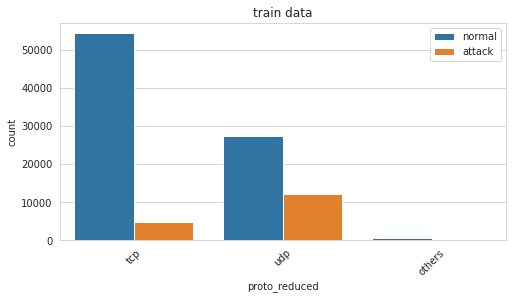

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,packet_length_min,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes/bulk_avg,fwd_packet/bulk_avg,fwd_bulk_rate_avg,bwd_bytes/bulk_avg,bwd_packet/bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_std,label,label.1,darknet,proto_reduced
66333,51827,17553,tcp,335051,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,8.953861,1.675255e+05,2.367514e+05,334934,117,335051,1.675255e+05,2.367514e+05,334934,117,0,0.000,0.000000e+00,0,0,0,0,0,0,60,0,8.953861,0.000000,0,0,0.000000,0.000000,0.000000,2,0,0,0,3,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,913,0,0,20,0,0,0,0,0.000000e+00,non-tor,p2p,0,tcp
110054,57621,57621,udp,113946771,4,0,176,0,44,44,44.000000,0.000000,0,0,0.000000,0.000000,1.544581,0.035104,3.798226e+07,6.184285e+03,37987094,37975289,113946771,3.798226e+07,6.184285e+03,37987094,37975289,0,0.000,0.000000e+00,0,0,0,0,0,0,32,0,0.035104,0.000000,44,44,44.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,55.000000,44.000000,0.000000,0,0,0,0,0,0,1,44,0,0,0,0,3,8,0,0,0,0,8.270970e+14,nonvpn,chat,0,udp
61888,36901,21347,tcp,105027432,15,14,2061,2475,1460,0,137.400000,383.471698,1024,0,176.785714,305.767679,43.188717,0.276118,3.750980e+06,1.097803e+07,45888687,5,105027432,7.501959e+06,1.483290e+07,45888687,177,105026898,8078992.154,1.528179e+07,45889536,26,0,0,0,0,312,292,0.142820,0.133299,0,1460,151.200000,337.792571,114103.820700,0,2,0,13,28,0,0,0,0,156.413793,137.400000,176.785714,0,0,0,0,7,4480,0,71,0,85,14600,1278,5,20,0,0,0,0,3.400334e+07,non-tor,p2p,0,tcp
69665,39736,19899,tcp,64500325,19,18,979,0,213,0,51.526316,50.937182,0,0,0.000000,0.000000,15.178218,0.573641,1.791676e+06,2.079092e+06,5795970,121,64500325,3.583351e+06,1.450838e+06,5796211,201217,62686869,3687462.882,1.424406e+06,5796166,201596,1,0,0,0,380,360,0.294572,0.279068,0,213,26.710526,43.907709,1927.886913,1,0,0,18,37,0,0,0,0,27.432432,51.526316,0.000000,0,0,0,0,0,0,0,26,0,0,1460,2008,17,20,0,0,0,0,2.015212e+07,non-tor,p2p,0,tcp
4911,46354,80,tcp,1503293,5,5,638,2528,638,0,127.600000,285.322274,1460,0,505.600000,706.057221,2106.043200,6.652063,1.670326e+05,5.008258e+05,1502568,6,1503283,3.758208e+05,7.512608e+05,1502712,20,1503117,375779.250,7.511925e+05,1502568,16,0,0,0,0,112,112,3.326032,3.326032,0,1460,287.818182,526.121244,276803.563600,1,2,0,2,9,0,0,0,1,316.600000,127.600000,505.600000,0,0,0,0,0,0,0,63,0,252,14600,993,1,20,0,0,0,0,8.032931e+05,non-tor,browsing,0,tcp


In [ ]:
col_countplot('proto_reduced') # Se muestra como se utilizan los protocolos en la data de entrenamiento
train.head()

**De la data de entrenamiento de tiene que:**
1. De un total de 82000 registros de tráfico normal, el 67% usa el protocolo tcp, y el 37% usa el protoloco udp
2. De un total de 15500 registros de tráfico darknet, el 29% usa el protocolo tcp, y el 79% usa el protoloco udp

-> El mayor tráfico darknet se hace utilizando el protocolo udp



**Service**

Categorical Features

In our dataset we can value "-" that is null, we need to remove that and replace it.

For normal there are lots of others that means most of "-" and few rare values.

In attack data "dns" is present higher than any other values. There are few no of others and http also.

In [ ]:
train['label.1'].nunique() #Numero de servicios en la data train

8

In [ ]:
train['label.1'].value_counts()#se muestran los servicios y el numero de registros

p2p                34027
browsing           22844
audio-streaming    12685
chat                7937
file-transfer       7857
video-streaming     6858
email               4346
voip                2482
Name: label.1, dtype: int64

In [ ]:
to_keep = ['p2p', 'browsing', 'audio-streaming', 'chat', 'file-transfer','video-streaming','email','voip','audio-streaming']
train['service_reduced'] = train['label.1'].apply(reduce_column, args=(to_keep,))

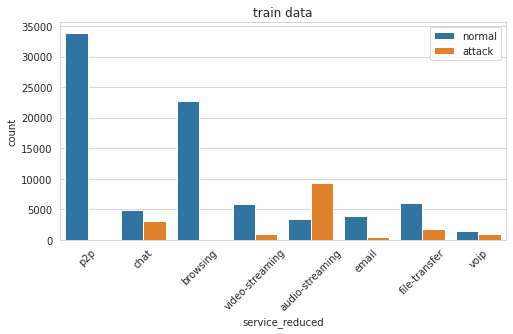

,src_port,dst_port,protocol,flow_duration,total_fwd_packet,total_bwd_packets,total_length_of_fwd_packet,total_length_of_bwd_packet,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,packet_length_min,packet_length_max,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,fwd_segment_size_avg,bwd_segment_size_avg,fwd_bytes/bulk_avg,fwd_packet/bulk_avg,fwd_bulk_rate_avg,bwd_bytes/bulk_avg,bwd_packet/bulk_avg,bwd_bulk_rate_avg,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,fwd_init_win_bytes,bwd_init_win_bytes,fwd_act_data_pkts,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_std,label,label.1,darknet,proto_reduced,service_reduced
66333,51827,17553,tcp,335051,3,0,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,8.953861,1.675255e+05,2.367514e+05,334934,117,335051,1.675255e+05,2.367514e+05,334934,117,0,0.000,0.000000e+00,0,0,0,0,0,0,60,0,8.953861,0.000000,0,0,0.000000,0.000000,0.000000,2,0,0,0,3,0,0,0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,0,0,913,0,0,20,0,0,0,0,0.000000e+00,non-tor,p2p,0,tcp,p2p
110054,57621,57621,udp,113946771,4,0,176,0,44,44,44.000000,0.000000,0,0,0.000000,0.000000,1.544581,0.035104,3.798226e+07,6.184285e+03,37987094,37975289,113946771,3.798226e+07,6.184285e+03,37987094,37975289,0,0.000,0.000000e+00,0,0,0,0,0,0,32,0,0.035104,0.000000,44,44,44.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,55.000000,44.000000,0.000000,0,0,0,0,0,0,1,44,0,0,0,0,3,8,0,0,0,0,8.270970e+14,nonvpn,chat,0,udp,chat
61888,36901,21347,tcp,105027432,15,14,2061,2475,1460,0,137.400000,383.471698,1024,0,176.785714,305.767679,43.188717,0.276118,3.750980e+06,1.097803e+07,45888687,5,105027432,7.501959e+06,1.483290e+07,45888687,177,105026898,8078992.154,1.528179e+07,45889536,26,0,0,0,0,312,292,0.142820,0.133299,0,1460,151.200000,337.792571,114103.820700,0,2,0,13,28,0,0,0,0,156.413793,137.400000,176.785714,0,0,0,0,7,4480,0,71,0,85,14600,1278,5,20,0,0,0,0,3.400334e+07,non-tor,p2p,0,tcp,p2p
69665,39736,19899,tcp,64500325,19,18,979,0,213,0,51.526316,50.937182,0,0,0.000000,0.000000,15.178218,0.573641,1.791676e+06,2.079092e+06,5795970,121,64500325,3.583351e+06,1.450838e+06,5796211,201217,62686869,3687462.882,1.424406e+06,5796166,201596,1,0,0,0,380,360,0.294572,0.279068,0,213,26.710526,43.907709,1927.886913,1,0,0,18,37,0,0,0,0,27.432432,51.526316,0.000000,0,0,0,0,0,0,0,26,0,0,1460,2008,17,20,0,0,0,0,2.015212e+07,non-tor,p2p,0,tcp,p2p
4911,46354,80,tcp,1503293,5,5,638,2528,638,0,127.600000,285.322274,1460,0,505.600000,706.057221,2106.043200,6.652063,1.670326e+05,5.008258e+05,1502568,6,1503283,3.758208e+05,7.512608e+05,1502712,20,1503117,375779.250,7.511925e+05,1502568,16,0,0,0,0,112,112,3.326032,3.326032,0,1460,287.818182,526.121244,276803.563600,1,2,0,2,9,0,0,0,1,316.600000,127.600000,505.600000,0,0,0,0,0,0,0,63,0,252,14600,993,1,20,0,0,0,0,8.032931e+05,non-tor,browsing,0,tcp,browsing


In [ ]:
col_countplot('service_reduced')
train.head()

In [ ]:
def PDFFuction (column):

  col = column
  train[col].nunique()

  plt.figure(figsize=(20,4))
  plt.subplot(121)
  dual_plot(col)
  plt.subplot(122)
  dual_plot(col, method=np.log1p)
  plt.show()

In [ ]:
HCorrelated = ['ack_flag_count','average_packet_size','bwd_header_length','bwd_segment_size_avg','flow_iat_max','fwd_header_length','fwd_iat_max','fwd_iat_total','fwd_packet_length_mean','fwd_segment_size_avg','subflow_bwd_bytes','subflow_fwd_bytes','subflow_fwd_bytes','total_fwd_packet','bwd_header_length','bwd_packet_length_mean','bwd_segment_size_avg','flow_duration','fwd_segment_size_avg','packet_length_mean']
# PDF a caracteristicas altamente correlacionadas

In [ ]:
#Para mostrar el numero de valores unicos en las caracteristicas correlacionadas
for v in (HCorrelated): 
    print('valore unicos en la columna'.format(*v))
    print (str(v))
    print (train[str(v)].nunique())
    print ('')

valore unicos en la columna
ack_flag_count
1995

valore unicos en la columna
average_packet_size
15708

valore unicos en la columna
bwd_header_length
2408

valore unicos en la columna
bwd_segment_size_avg
11977

valore unicos en la columna
flow_iat_max
61589

valore unicos en la columna
fwd_header_length
2386

valore unicos en la columna
fwd_iat_max
46528

valore unicos en la columna
fwd_iat_total
48278

valore unicos en la columna
fwd_packet_length_mean
12832

valore unicos en la columna
fwd_segment_size_avg
12832

valore unicos en la columna
subflow_bwd_bytes
1066

valore unicos en la columna
subflow_fwd_bytes
835

valore unicos en la columna
subflow_fwd_bytes
835

valore unicos en la columna
total_fwd_packet
1710

valore unicos en la columna
bwd_header_length
2408

valore unicos en la columna
bwd_packet_length_mean
11977

valore unicos en la columna
bwd_segment_size_avg
11977

valore unicos en la columna
flow_duration
63030

valore unicos en la columna
fwd_segment_size_avg
12832

va

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
ack_flag_count


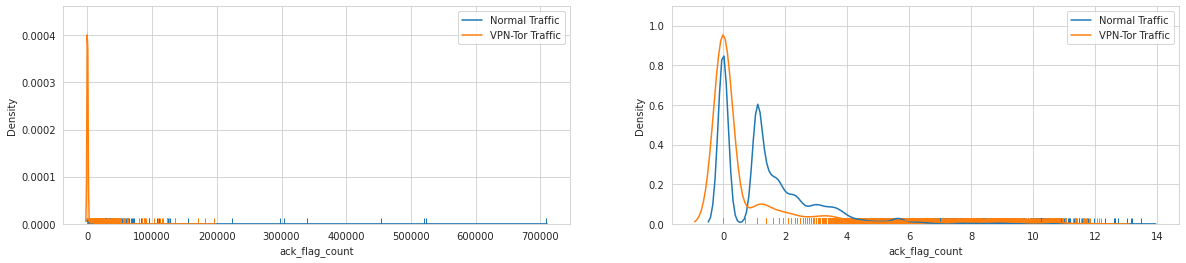

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
average_packet_size


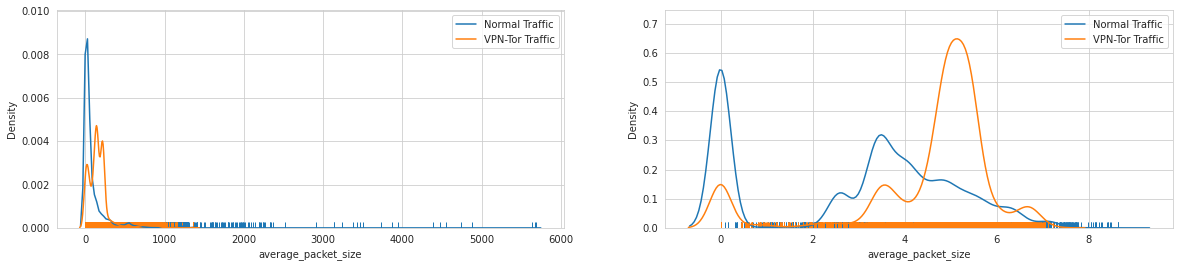

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
bwd_header_length


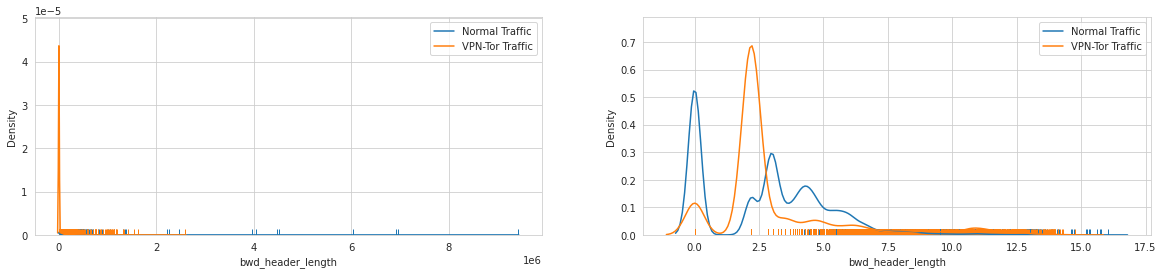

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
bwd_segment_size_avg


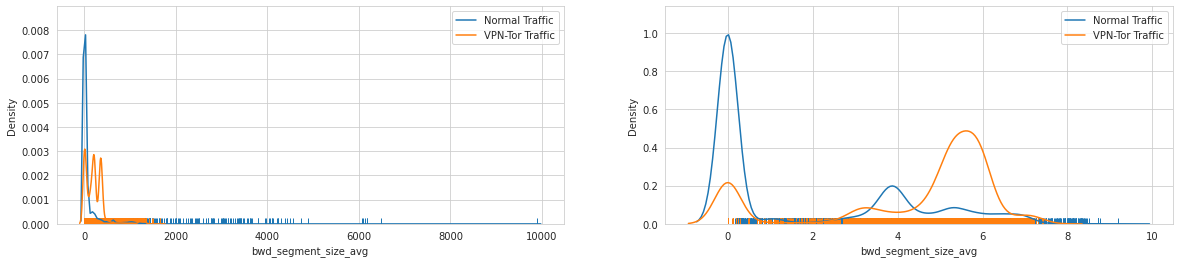

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
flow_iat_max


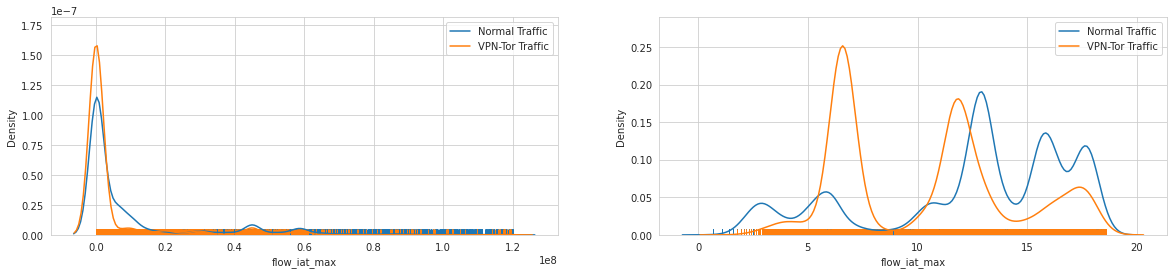

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
fwd_header_length


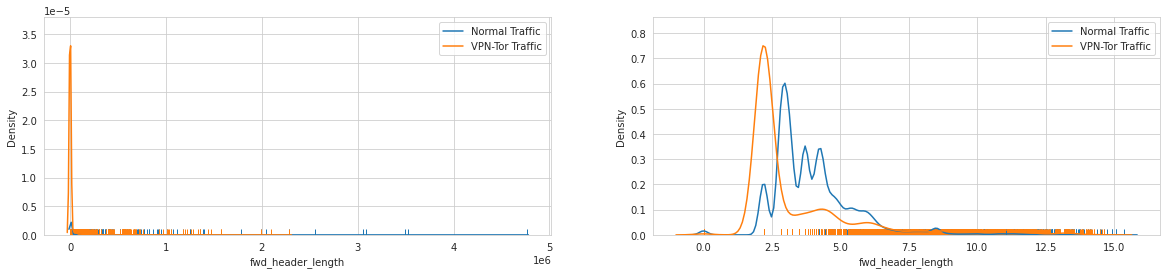

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
fwd_iat_max


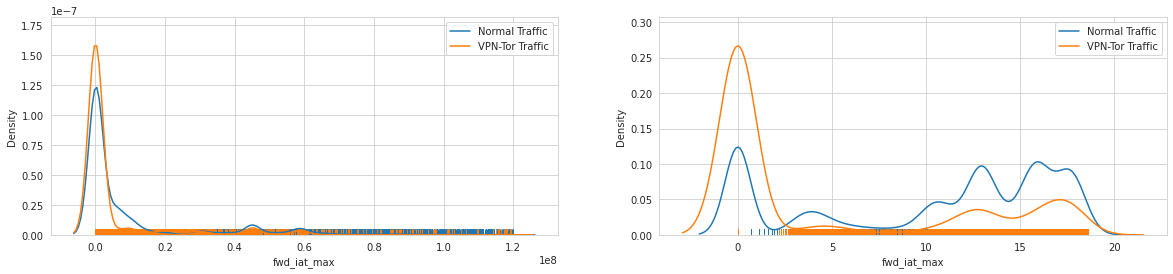

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
fwd_iat_total


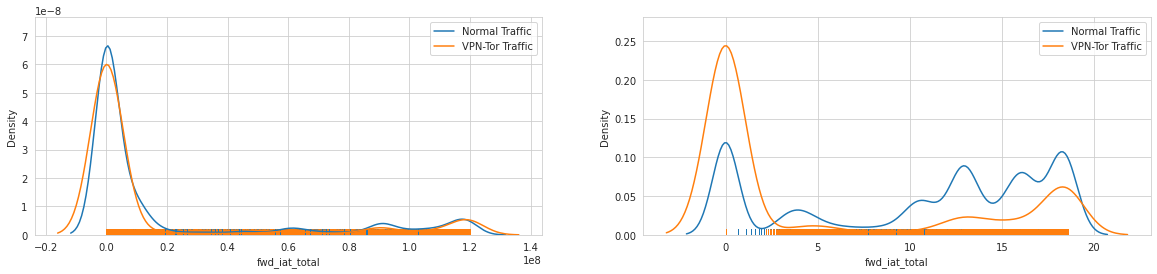

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
fwd_packet_length_mean


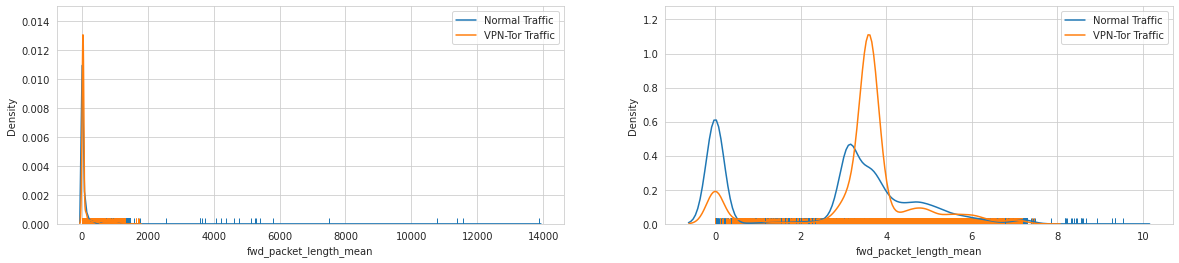

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
fwd_segment_size_avg


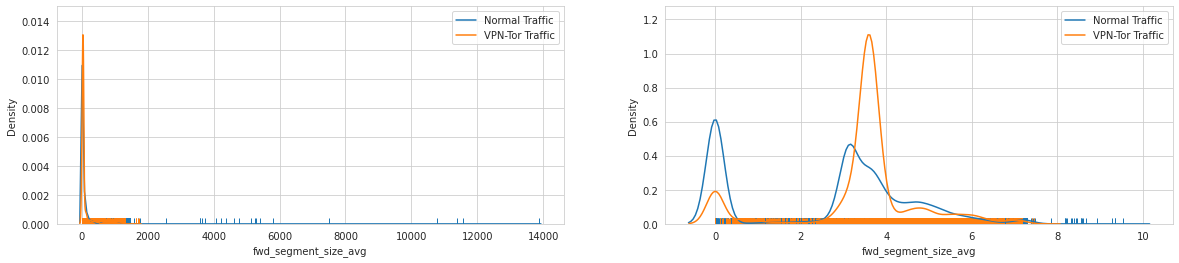

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
subflow_bwd_bytes


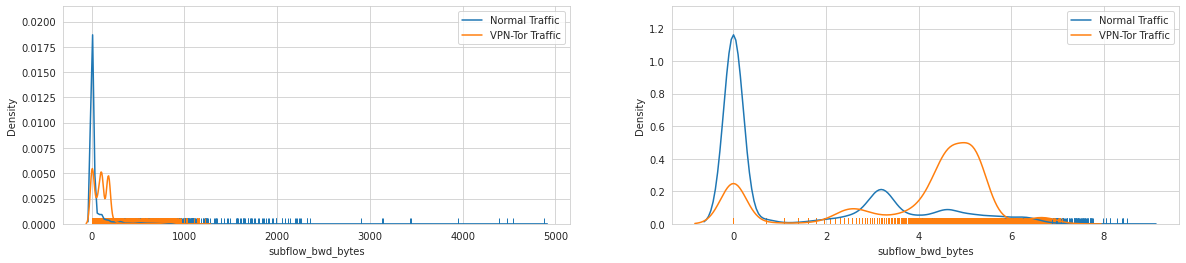

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
subflow_fwd_bytes


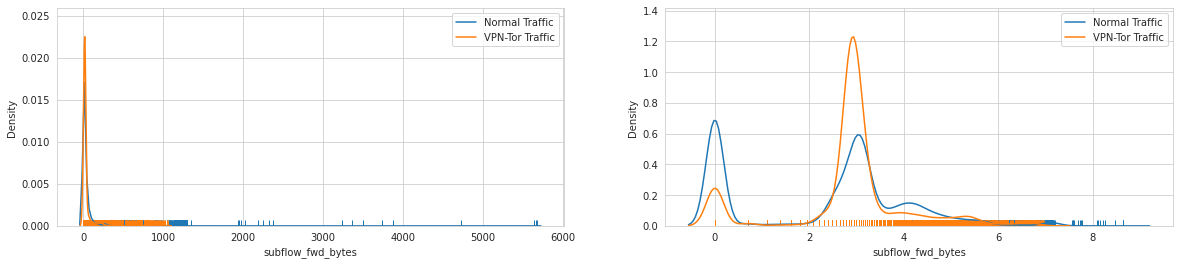

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
subflow_fwd_bytes


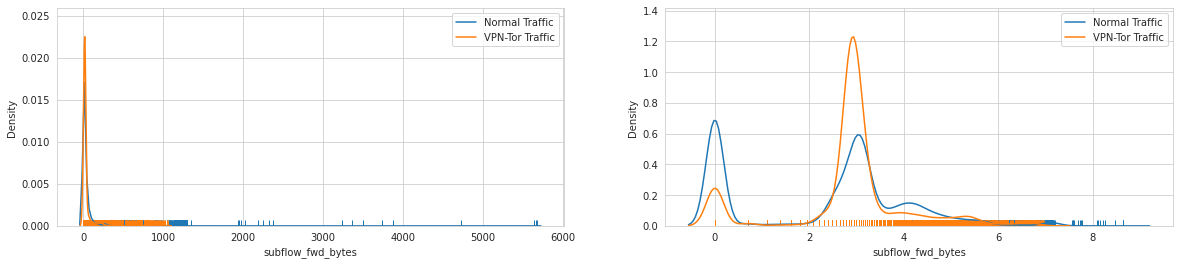

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
total_fwd_packet


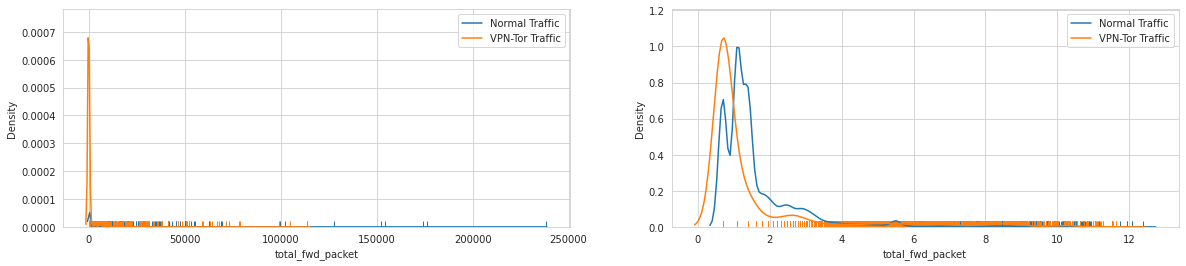

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
bwd_header_length


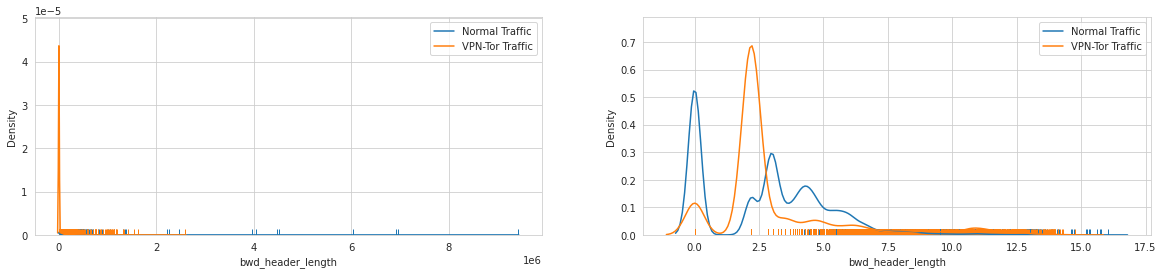

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
bwd_packet_length_mean


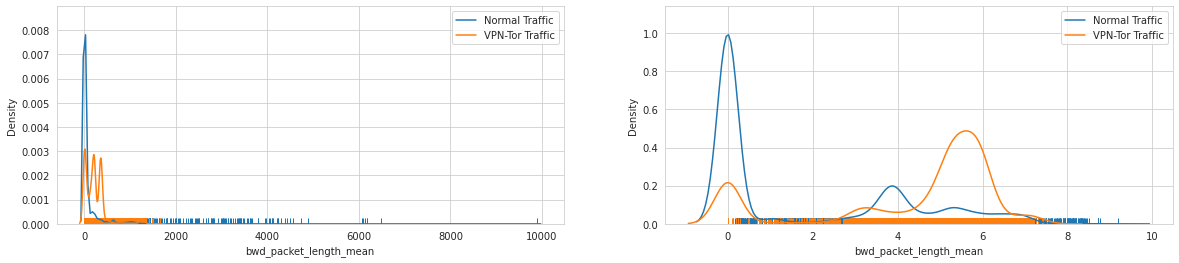

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
bwd_segment_size_avg


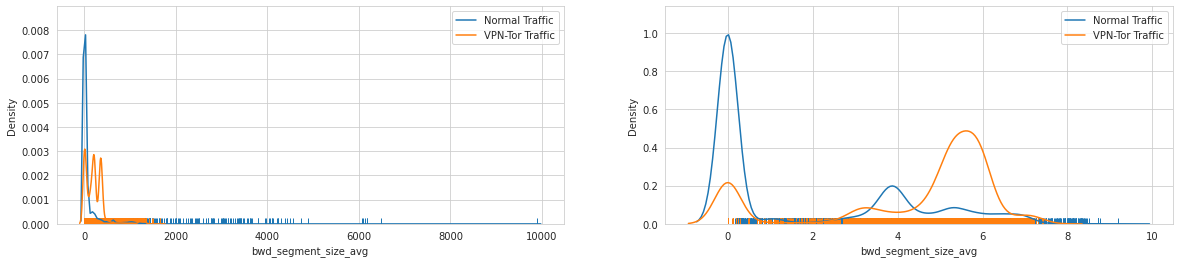

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
flow_duration


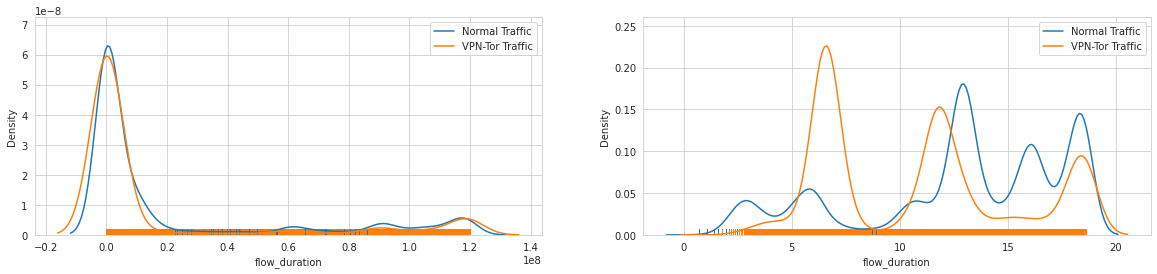

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
fwd_segment_size_avg


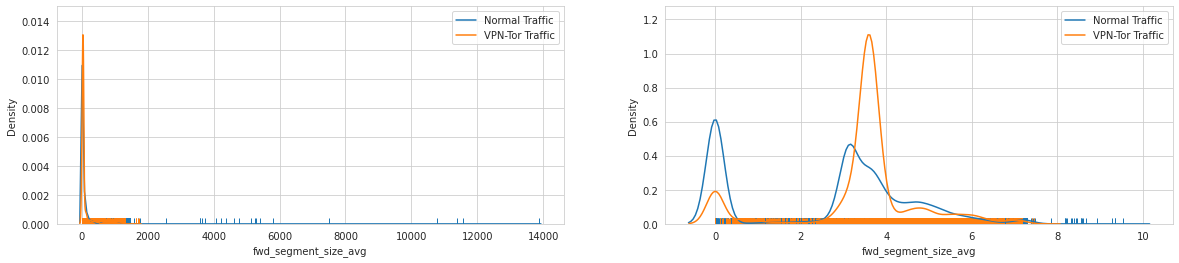

Grafica de la pdf de la función dada en datos de VPN-TOR y normal para
packet_length_mean


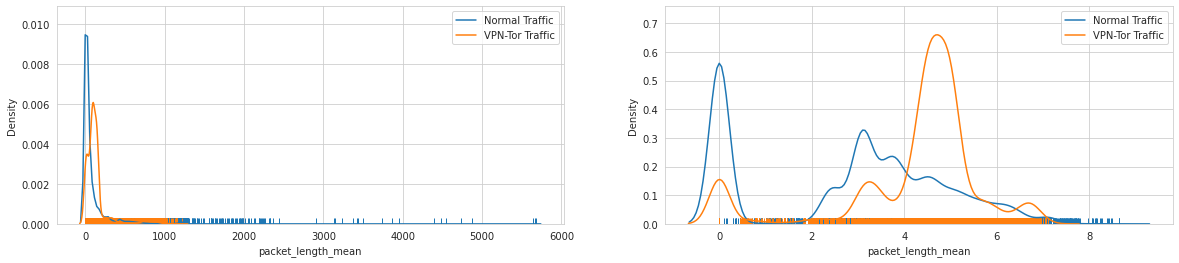

In [ ]:
for v in (HCorrelated): 
    print('Grafica de la pdf de la función dada en datos de VPN-TOR y normal para'.format(*v))
    print (str(v))
    PDFFuction(str(v))

#Modelo de categorizacion
#____________________SVM maquina de soporte vectorial para clasificacion

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
Caracteristicas = data_clean [HCorrelated].copy(deep=True)
Clases = data_clean ['darknet'].copy(deep=True)

###SEparamos los datos entre caracteristicas y clases a clasificar

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Caracteristicas,Clases, test_size=0.2, random_state=100)
#### Separacion entre datos de entrenamiento y test y adicional separamos las caracteriticas y la variable a clasificar


In [ ]:
for C_param in np.array([0.01,0.1,1.0,10]):
  sv = LinearSVC(C=C_param, max_iter=10000)
  sv.fit(X_train,y_train)
  print ("C=", C_param)
  print ("score_train",sv.score(X_train,y_train))
  print ("score_test",sv.score(X_test,y_test))

  ### Al clasificador de soporte vectorial le pasamos diferentes parametros de 
  ###regularizacion (C) y con ellos estamos entrenando el modelo, luego de 
  ##entrenar el modelo probamos con los datos de prueba y de validacion la 
  ##eficacia del modelo(score train, score test)

  ##Un modelo se cataloga como bueno si posee una alta calificacion tanto en 
  ##los datos de prueba como de validacion 
  ##Si un modelo poseee un alto rendimiento con los datos de prueba pero bajo con los datos de validacion
  ##se considera sobre entrenado

C= 0.01
score_train 0.3069691829233814
score_test 0.31236526840301093
C= 0.1
score_train 0.8714747667514843
score_test 0.8689260345619677
C= 1.0
score_train 0.30385920271416456
score_test 0.30876064600487685
C= 10.0
score_train 0.37068843652813116
score_test 0.3721595928897056


In [ ]:
Caracteristicas.iloc[0].to_list()

[2.0,
 0.0,
 20.0,
 0.0,
 229.0,
 20.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 20.0,
 0.0,
 0.0,
 229.0,
 0.0,
 0.0]

In [ ]:
sv.predict([[2.0,
 0.0,
 20.0,
 0.0,
 229.0,
 20.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 20.0,
 0.0,
 0.0,
 229.0,
 0.0,
 0.0]])[0]

0

In [ ]:
sv.predict([[2794,
909.1105941,
40540,
1208.106068,
10430835,
15340,
10431320,
119384314,
118.2281617,
118.2281617,
876,
32,
32,
767,
40540,
1208.106068,
1208.106068,
119384497,
118.2281617,
118.2281617,]])[0]

1